# Cleaning procedure.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [1]:
df = pd.read_csv(
            "/Users/edwardsujono/Python_Project/h1b_visa_analytic/data/h1b_kaggle.csv"
)

We need to delete WITHDRAWN status from the data collections. WITHDRAWN status means that particular user has withdrawn their visa request before the result is decided, so that kind of data is unrelevant to our analysis. 
Latitude and Longitude are not relevant to our analysis as well since the value is continuos.

In [2]:
df.drop(df[df.CASE_STATUS == "WITHDRAWN"].index, inplace=True)
df.drop("lon", 1, inplace=True)
df.drop("lat", 1, inplace=True)

Remove all the empty column

In [8]:
df = df.dropna()
df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00,2016.0,"ANN ARBOR, MICHIGAN"
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00,2016.0,"PLANO, TEXAS"
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00,2016.0,"JERSEY CITY, NEW JERSEY"
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00,2016.0,"DENVER, COLORADO"
5,6,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.00,2016.0,"MIAMI, FLORIDA"
6,7,CERTIFIED-WITHDRAWN,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.00,2016.0,"HOUSTON, TEXAS"
7,8,CERTIFIED-WITHDRAWN,"GLOBO MOBILE TECHNOLOGIES, INC.",CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.00,2016.0,"SAN JOSE, CALIFORNIA"
8,9,CERTIFIED-WITHDRAWN,ESI COMPANIES INC.,CHIEF EXECUTIVES,PRESIDENT,Y,127546.00,2016.0,"MEMPHIS, TEXAS"
10,11,CERTIFIED-WITHDRAWN,H.J. HEINZ COMPANY,CHIEF EXECUTIVES,"CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA",Y,182978.00,2016.0,"PITTSBURGH, PENNSYLVANIA"
11,12,CERTIFIED-WITHDRAWN,DOW CORNING CORPORATION,CHIEF EXECUTIVES,VICE PRESIDENT AND CHIEF HUMAN RESOURCES OFFICER,Y,163717.00,2016.0,"MIDLAND, MICHIGAN"


Inner join with the real SOC data because several data in SOC_NAME is rubbish

In [11]:
df_soc = pd.read_csv(
            "/Users/edwardsujono/Python_Project/h1b_visa_analytic/data/soc_code.csv"
        )
result = pd.merge(df,  df_soc[["Code", "Title"]], left_on="SOC_NAME", right_on="Title", how="inner")
df = result
# result.to_csv("/Users/edwardsujono/Python_Project/h1b_visa_analytic/data/clean_data.csv")

Get all the CASE STATUS first

In [12]:
all_case_status = df.CASE_STATUS.unique()
all_case_status

array(['CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED', 'REJECTED'], dtype=object)

Basically we just interested with these 4 statuses: 'CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED', 'REJECTED', all the rest is unusefull.

In [13]:
df = df[df.CASE_STATUS.isin(['CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED', 'REJECTED'])]
df.CASE_STATUS.value_counts()

CERTIFIED              1352292
CERTIFIED-WITHDRAWN     100505
DENIED                   63568
REJECTED                     2
Name: CASE_STATUS, dtype: int64

# Visualization

On each year applicants that is certified increase

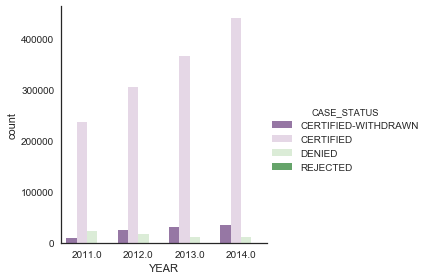

In [21]:
%matplotlib inline
df_year_case_status = df[['CASE_STATUS', 'YEAR']]
ax=sns.factorplot('YEAR', data=df_year_case_status, hue='CASE_STATUS', kind='count', palette='PRGn')
sns.set(style="white", color_codes=True)